In [1]:
import numpy as np
from matplotlib.colors import LogNorm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})

In [2]:
f_name = "/postProcessing/forces/0/coefficient.dat" 
fo_name = "./oscillatory_bounday_condition/cases/" 

fq = np.arange(3, 16, 1)
amp = np.arange(0.1, 3.5, 0.1)
cases = []
for i in amp:
    for j in fq:
        case = 'A{:.1f}-f{:d}'.format(i, j)
        cases.append(case)

In [3]:
data = {}
for case in cases:
    data[case] = np.loadtxt(fo_name + case + f_name, unpack=True, usecols=[0, 1, 3])

In [4]:
tml  = (np.abs(list(data.values())[0][0] - 4.0)).argmin()
print(tml) 
print(data['A0.2-f5'][1].shape)
data['A0.2-f5'][1][tml:].shape

4000
(8001,)


(4001,)

In [5]:
#fig, (ax) = plt.subplots(1, 1, figsize=(7, 4))
for i, case in enumerate(cases):
    a = data[case][0][tml:]
    b = data[case][1][tml:]
    #ax.plot(a, b, linewidth=2)


In [6]:

mesh_size = np.arange(1, (len(fq) * len(amp)) + 1, 1)

mean_cd = np.zeros(len(cases))
max_cd = np.zeros(len(cases))
min_cd = np.zeros(len(cases))

for i, case in enumerate(cases):
    mean_cd[i] = data[case][1][tml:].mean()
    max_cd[i] = data[case][1][tml:].max()
    min_cd[i] = data[case][1][tml:].min()
plt.plot(mesh_size, mean_cd, '--o', markersize=10, color='Purple')
plt.plot(mesh_size, max_cd, '-s', markersize=10, color='r')
plt.plot(mesh_size, min_cd, '-D', markersize=10, color='b')
plt.close()
print(tml)

4000


In [7]:
print('maximum of max value is at',cases[max_cd.argmax()], ' :', max_cd.max())
print('minimum of max value is at',cases[max_cd.argmin()], ' :', max_cd.min())
print('\n')
print('maximum of min value is at',cases[min_cd.argmax()], ' :', min_cd.max())
print('minimum of min value is at',cases[min_cd.argmin()], ' :', min_cd.min())
print('\n')
print('maximum of mean value is at',cases[mean_cd.argmax()], ' :', mean_cd.max())
print('minimum of mean value is at',cases[mean_cd.argmin()], ' :', mean_cd.min())

dif = max_cd - min_cd
print('\n')
print('maximum of dif value is at',cases[dif.argmax()], ' :', dif.max())
print('minimum of dif value is at',cases[dif.argmin()], ' :', dif.min(), ', (', max_cd[dif.argmin()],'-',min_cd[dif.argmin()],')')


maximum of max value is at A3.4-f3  : 11.9771414
minimum of max value is at A3.4-f11  : 2.92485938


maximum of min value is at A3.1-f3  : 6.60227383
minimum of min value is at A3.4-f11  : 2.77949033


maximum of mean value is at A3.1-f3  : 8.64147577043739
minimum of mean value is at A3.4-f11  : 2.8521582426968255


maximum of dif value is at A3.4-f3  : 5.94794256
minimum of dif value is at A0.4-f9  : 0.03676049999999975 , ( 3.21413665 - 3.17737615 )


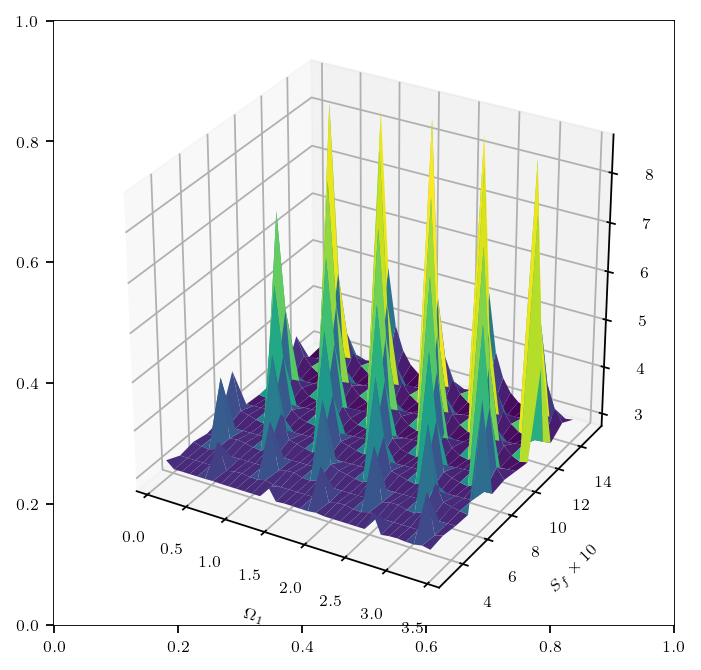

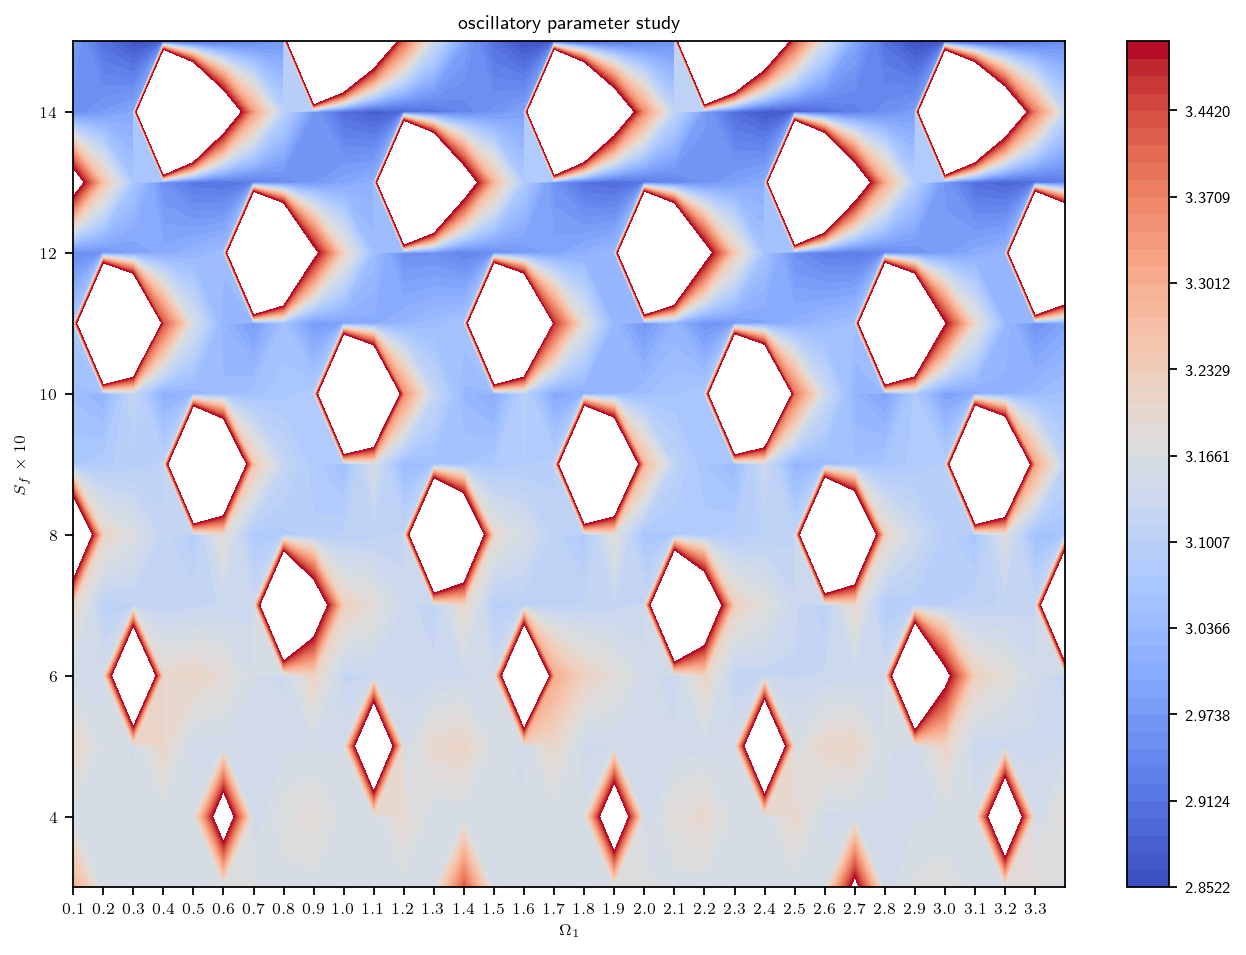

In [8]:
X, Y = np.meshgrid(amp, fq)

fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))

a = np.resize(mean_cd, (len(fq), len(amp)))
lvls_1 = np.logspace(np.log10(a.min()), np.log10(3.5), 50)

ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(X, Y, a, cmap='viridis', edgecolor='none')
ax1.set_ylabel(r'$S_f \times 10$')
ax1.set_xlabel('$\Omega_1$')

fig, (ax2) = plt.subplots(1, 1, figsize=(10, 7))

cont = ax2.contourf(X, Y, a, levels=lvls_1, cmap=mpl.cm.coolwarm)
ax2.set_title('oscillatory parameter study')
ax2.set_ylabel(r'$S_f \times 10$')
ax2.set_xlabel('$\Omega_1$')
ax2.set_xticks(np.arange(amp.min(), amp.max(), 0.1))
fig.colorbar(cont, format='%.4f',ax=ax2)


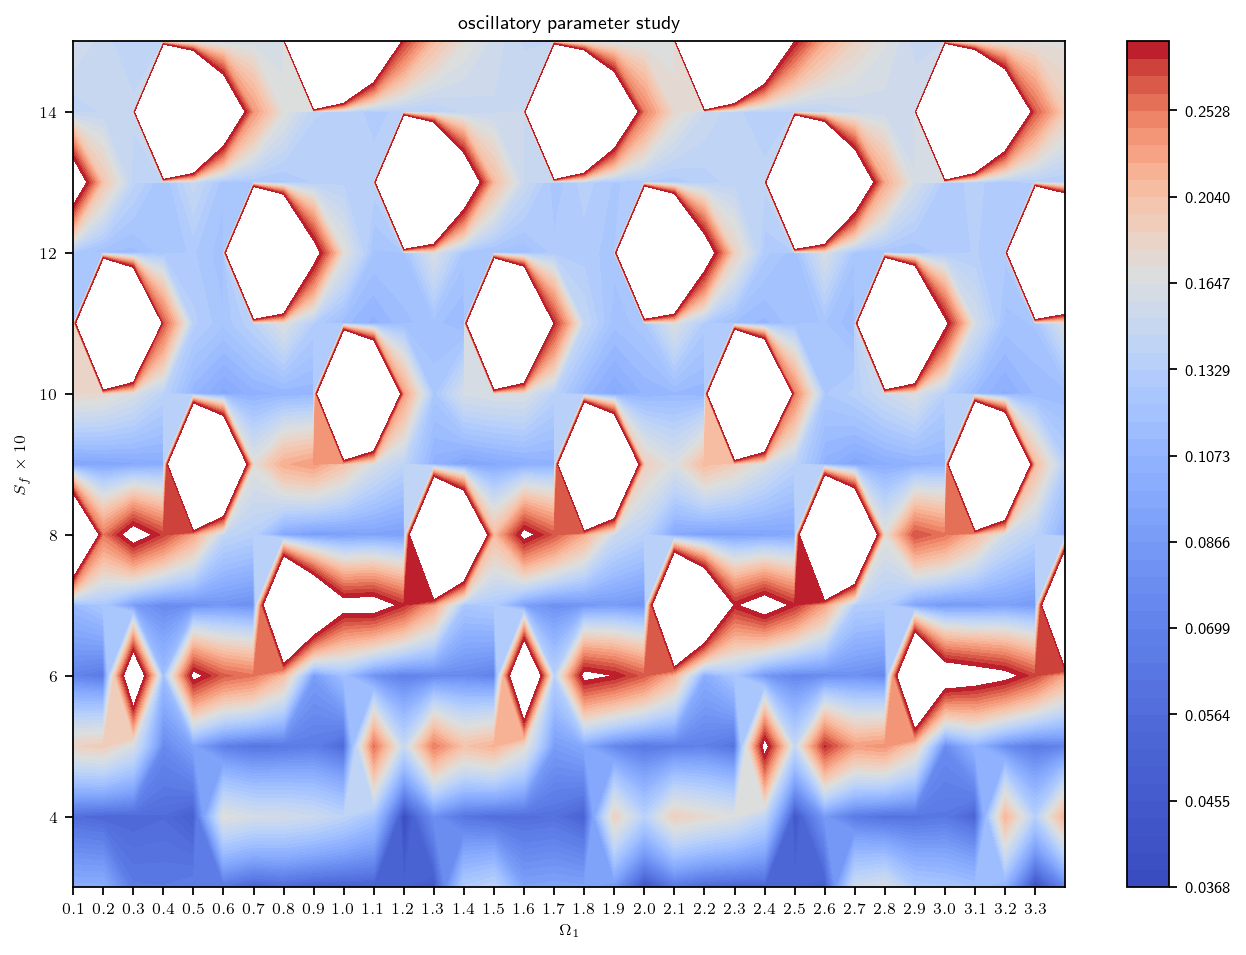

In [10]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 7))

a1 = np.resize((max_cd - min_cd), (len(fq), len(amp)))
lvls_2 = np.logspace(np.log10(a1.min()), np.log10(0.3), 50)

cont = ax.contourf(X, Y, a1, levels=lvls_2, cmap=mpl.cm.coolwarm)
ax.set_title('oscillatory parameter study')
ax.set_ylabel(r'$S_f \times 10$')
ax.set_xlabel('$\Omega_1$')
ax.set_xticks(np.arange(amp.min(), amp.max(), 0.1))
fig.colorbar(cont,format='%.4f')